# FLIGHT PREDICTION

# problem statement:
The flight tickets are hard to predict because today price not be tommorrows ,if we might see a price whereas check out the same ticket for same flight tomorrow it will be different and Thus we are gonna prove that with the given data
you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities


# dataset description

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
#train data size
train_df.shape

(10683, 11)

In [7]:
#test data -size
test_df.shape

(2671, 10)

In [8]:
#appending train and test dataframe
df=train_df.append(test_df,sort=False)
df.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [9]:
#shape of the dataframe
df.shape


(13354, 11)

In [10]:
#datatype
df.dtypes


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [11]:
#describe
df.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# DATA CLEANING

In [12]:
#finding whether the data has null value or not
print(df.isnull().sum())


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64


In [13]:
#replacing with mean value
df['Price'].fillna((df['Price'].mean()),inplace=True)


In [14]:
#after replacing,checking whether there is any null value
print(df.isnull().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [15]:
print(df['Total_Stops'])


0       non-stop
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 13354, dtype: object


In [16]:
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')


In [17]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')


In [18]:
print(df['Total_Stops'])


0        0 stop
1       2 stops
2       2 stops
3        1 stop
4        1 stop
         ...   
2666     1 stop
2667     0 stop
2668     1 stop
2669     1 stop
2670     1 stop
Name: Total_Stops, Length: 13354, dtype: object


In [19]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]


In [20]:
df.head()
df.dtypes


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Stop                object
dtype: object

In [21]:
df['Stop']=df['Stop'].astype(int)
df=df.drop(['Total_Stops'],axis=1)
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Stop
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897.0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882.0,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1


# FEATURE ENGINEERING

In [22]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]


In [23]:
df=df.drop(['Date_of_Journey'],axis=1)


In [24]:
print(df.head())
print(df.dtypes)


       Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Additional_Info    Price  Stop Date Month  Year  
0  01:10 22 Mar   2h 50m         No info   3897.0     0   24    03  2019  
1         13:15   7h 25m         No info   7662.0     2    1    05  2019  
2  04:25 10 Jun      19h         No info  13882.0     2    9    06  2019  
3         23:30   5h 25m         No info   6218.0     1   12    05  2019  
4         21:35   4h 45m         No info  13302.0     1   01    03  2019  
Airline             object
Source              object
Destination         object
Route               object
Dep_Time 

In [25]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
print(df.dtypes)
print(df.head())


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Stop                 int32
Date                 int32
Month                int32
Year                 int32
dtype: object
       Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Additional_Info    Price  Stop  Date  Month  Year  
0  01:10 22 Mar   2h 50m         No info   3897.0     0    24      3  2019  
1         13:15   7h 25m         No info   7662.

In [26]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0]
df['Arrival_Minute'] =df['Arrival_Time'] .str.split(':').str[1]
print(df.dtypes)


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Stop                 int32
Date                 int32
Month                int32
Year                 int32
Arrival_Hour        object
Arrival_Minute      object
dtype: object


In [27]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
print(df.dtypes)
df=df.drop(['Arrival_Time'],axis=1)
df.head()


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Stop                 int32
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Minute       int32
dtype: object


,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,2,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,2,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,1,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,1,3,2019,21,35


In [28]:
df['Departure_Hour'] =df['Dep_Time'] .str.split(':').str[0]
df['Departure_Minute'] =df['Dep_Time'] .str.split(':').str[1]

df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)
df.head()


,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,2,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,2,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,1,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,1,3,2019,21,35,16,50


In [29]:
df=df.drop(['Duration'],axis=1)
df.head()


,Airline,Source,Destination,Route,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,2,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,2,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,1,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,1,3,2019,21,35,16,50


In [30]:
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df.head()


,Airline,Source,Destination,Route,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,2,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,2,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,1,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [31]:
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)
df.head()


,Airline,Source,Destination,Route,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,2,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,2,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,1,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [32]:
df=df.drop(['Route'],axis=1)
df.head()
df.isnull().sum()


Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Stop                0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

# Preprocessing-encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])
df["Additional_Info"]=encoder.fit_transform(df['Additional_Info'])
df["Route_1"]=encoder.fit_transform(df['Route_1'])
df["Route_2"]=encoder.fit_transform(df['Route_2'])
df["Route_3"]=encoder.fit_transform(df['Route_3'])
df["Route_4"]=encoder.fit_transform(df['Route_4'])
df["Route_5"]=encoder.fit_transform(df['Route_5'])
df.head()


,Airline,Source,Destination,Additional_Info,Price,Stop,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,0,24,3,2019,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,2,1,5,2019,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,2,9,6,2019,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,1,12,5,2019,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,1,3,2019,21,35,16,50,0,34,8,12,4


In [34]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
df_train=df[0:10683]
df_test=df[10683:]
X=df_train.drop(['Price'],axis=1)
y=df_train.Price


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)
model.get_support()
selected_features=X_train.columns[(model.get_support())]
selected_features


Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Stop', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [36]:
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)


In [37]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.4s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 30.4min finished


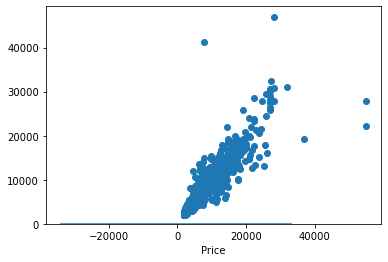

In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)
y_pred=rf_random.predict(X_test)

sns.distplot(y_test-y_pred)
plt.scatter(y_test,y_pred)
